## 1. 선형 회귀 분석
선형 회귀 분석(Linear Regression)은 주어진 데이터에서 입력 변수(독립 변수)와 출력 변수(종속 변수) 사이의 관계를 직선(또는 다차원에서는 평면)으로 설명하고, 새로운 입력 값에 대한 출력을 예측하는 통계 및 머신러닝 기법입니다. 예를 들어, 공부 시간(입력 변수)과 시험 점수(출력 변수) 사이의 관계를 분석해 "공부 시간이 늘어날수록 시험 점수가 증가한다"는 패턴을 찾아냅니다. 이 과정에서 선형 회귀는 "Y = W X + b"라는 수식(기울기 W와 절편 b)으로 데이터를 표현하며, 최적의 기울기와 절편을 찾기 위해 비용 함수(Cost Function)를 최소화하는 경사 하강법(Gradient Descent) 등의 알고리즘을 사용합니다. 최종적으로 선형 회귀 모델은 주어진 입력 값에 대해 가장 적합한 예측 결과를 제공합니다.

> **경사하강법**
- 비용 함수의 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저 알고리즘이라고 함
- 최적화 알고리즘이라고도 함
- 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 '학습'이라고 부름
- 경사 하강법은 가장 기본적인 옵티마이저 알고리즘

- 출처: https://coding-yesung.tistory.com/214 [코딩하는 춘식이:티스토리]
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbyRI4b%2FbtsludLaVjV%2FAAAAAAAAAAAAAAAAAAAAACvsfGnsCTjW0CYZ5yH-HAfSeJ27bj4BJkkBfPlHVpCN%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1753973999%26allow_ip%3D%26allow_referer%3D%26signature%3DfSwZGVCKIjSj67HX8ioUvembs74%253D">

## 2. 단항 선형 회귀
단항 선형 회귀(Simple Linear Regression)는 하나의 독립 변수(입력 변수, X)를 사용하여 하나의 종속 변수(출력 변수, Y)를 예측하는 통계 및 머신러닝 기법입니다. 입력 변수와 출력 변수 사이의 관계를 직선(Linear Line)으로 나타내며, 데이터의 패턴을 기반으로 가장 잘 맞는 직선을 찾아내어 새로운 입력 값에 대한 출력을 예측합니다.

In [1]:
import torch
# 파이토치를 이용해서 ML/DL모델을 만들 수 있도록 해주는 모듈
import torch.nn as nn
# 옵티마이저 알고리즘(최적화 or 경사하강법 알고리즘)
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(2025)
# 일단 랜덤하게 선이 그어지는데 그 랜덤하게 나오는 고정값을 설정함 -> 2025 로 고정

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
print(x_train,x_train.shape)
print(y_train,y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


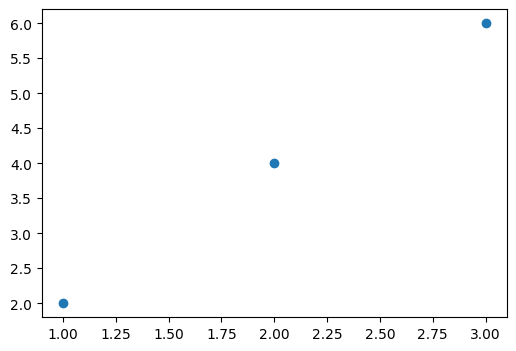

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train)

In [5]:
# y = Wx + b    # -1 ~ 1 범위 내에서 무작위로 선택
model = nn.Linear(1,1)      # 직선 그어주는 방정식을 세울 수 있음 -> (입력 특성의 수, 출력 특성의 수)
print(model)

# Linear(in_features=1, out_features=1, bias=True)

Linear(in_features=1, out_features=1, bias=True)


In [6]:
# model가지고 예측
y_pred = model(x_train)
print(y_pred)
# 기울기 조정한 적이 없기때문에, 값이 엉망으로 나옴

tensor([[1.2410],
        [1.6109],
        [1.9809]], grad_fn=<AddmmBackward0>)


In [7]:
print(list(model.parameters()))
# 기울기가 나중에 미분되면서 변경할 수 있게 수식을 기억하고있겠다! = requires_grad=True

[Parameter containing:
tensor([[0.3699]], requires_grad=True), Parameter containing:
tensor([0.8711], requires_grad=True)]


In [8]:
# 값 직접 계산하기 , y = Wx +b
print(0.3699*1+ 0.8711)
print(0.3699*2+ 0.8711)
print(0.3699*3+ 0.8711)

1.241
1.6109
1.9808000000000001


### 손실 함수

손실 함수(Loss Function)는 머신러닝과 딥러닝 모델이 예측한 값과 실제 값 사이의 차이를 수치적으로 나타내는 함수입니다. 모델이 학습을 통해 최적의 결과를 도출하려면 이 차이를 최소화해야 합니다. 손실 함수는 예측값과 실제값의 오차를 계산하여 하나의 숫자(스칼라 값)로 반환하며, 이 값은 비용(Cost) 또는 오차(Error)라고도 불립니다. 예를 들어, 회귀 문제에서는 주로 평균 제곱 오차(MSE, Mean Squared Error)를 사용하여 예측값과 실제값 간의 평균적인 차이를 측정하고, 분류 문제에서는 교차 엔트로피 손실(Cross-Entropy Loss)을 사용해 예측 확률 분포와 실제 레이블 분포 간의 차이를 계산합니다. 손실 함수가 반환한 값은 역전파(Backpropagation)를 통해 모델의 가중치와 편향을 조정하는 데 사용됩니다. 즉, 손실 함수는 모델이 학습 과정에서 목표로 삼아야 할 방향을 알려주는 나침반 역할을 합니다.

- MSE 값이 작을수록 모델의 예측 정확도가 높다고 판단할 수 있다.

<img src='https://blog.kakaocdn.net/dna/LIEFi/btsPxTEnIqk/AAAAAAAAAAAAAAAAAAAAAL6QWr332q9da-L7FgtxeHG-oi7ym6QJbPBH30HF7OCN/img.webp?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=mR8sOT0QxNbcUa99%2FYfKPaL%2FgUQ%3D'>

단 , MAE는 잘 쓰지 않음 . 오류 측정에는 용이하지만 기울기 변화의 근거로 사용하기에는 좋지 않음
왜? 미분을 해서 반대로 값을 돌려보는데, 절댓값 미분이 쉽지 않음

> MSE와 분산의 관계
MSE는 분산과 편향(Bias)의 합으로 표현될 수 있습니다. 즉, MSE를 줄이기 위해서는 분산과 편향을 모두 줄여야 합니다.

In [9]:
((y_pred - y_train)**2).mean()

tensor(7.4790, grad_fn=<MeanBackward0>)

In [10]:
# 파이토치 내장함수 nn.MSELoss()()
loss = nn.MSELoss()(y_pred, y_train)
loss
# tensor(7.4790, grad_fn=<MseLossBackward0>)

# __call()__ 실행한 것처럼
# mse_loss = nn.MSELoss()mse_loss(y_pred, y_train)

tensor(7.4790, grad_fn=<MseLossBackward0>)

### 최적화

최적화(Optimization)는 주어진 목표를 달성하기 위해 최상의 해결책(Optimal Solution)을 찾아가는 과정입니다. 머신러닝과 딥러닝에서는 주로 모델이 예측한 값과 실제 값 사이의 오차(손실 함수 값)를 최소화하는 것을 목표로 합니다. 이 과정에서 모델의 학습 가능한 파라미터(가중치와 편향)를 조정하여 손실 함수의 값을 점점 더 작게 만들어갑니다.

최적화는 주로 경사 하강법(Gradient Descent)과 같은 알고리즘을 사용해 수행되며, 손실 함수의 기울기(Gradient)를 따라가며 최저점(또는 최적점)을 찾습니다. 이 과정은 마치 산에서 가장 낮은 지점을 찾아 내려가는 것과 비슷합니다. 최적화는 단순히 손실을 줄이는 것뿐만 아니라, 학습 속도, 안정성, 과적합 방지와 같은 다양한 요소를 고려해야 하는 복합적인 과정입니다.

즉, 최적화는 모델이 데이터로부터 가장 정확하고 효율적인 예측을 할 수 있도록 파라미터를 조정하는 핵심 과정입니다.

## 경사하강법

경사하강법(Gradient Descent)은 머신러닝과 딥러닝 모델이 최적의 가중치(Weights)와 편향(Biases)를 찾기 위해 손실 함수(Loss Function)를 최소화하는 방법입니다. 이 알고리즘은 마치 산 꼭대기에서 출발해 가장 낮은 지점(최솟값)을 찾아 내려가는 과정과 비슷합니다.

먼저, 모델은 손실 함수의 기울기(Gradient)를 계산합니다. 이 기울기는 현재 지점에서 손실이 가장 빠르게 감소하는 방향을 나타냅니다. 이후, 모델은 기울기의 반대 방향으로 가중치와 편향 값을 조금씩 업데이트합니다. 이때 학습률(Learning Rate)은 한 번에 이동하는 "걸음의 크기"를 결정합니다. 학습률이 너무 크면 최적의 지점을 지나칠 수 있고, 너무 작으면 학습 속도가 매우 느려질 수 있습니다. 이 과정을 반복하면서 손실 함수 값이 점점 작아지고, 결국 최적의 가중치와 편향을 찾아내게 됩니다.

즉, 경사하강법은 모델이 더 나은 예측을 할 수 있도록 가중치를 조정해주는 핵심 최적화 알고리즘입니다.

경사하강법은 데이터를 어떻게 나눠서 학습하느냐에 따라 배치(Batch)= 일반 경사하강법, 확률적(Stochastic), 미니배치(Mini-Batch)로 나뉩니다.

<img src="https://blog.kakaocdn.net/dna/deKpeG/btsPxzsHJXU/AAAAAAAAAAAAAAAAAAAAAIWmDKutVPEH0ZP17BmczCQ6vtjFqolLNKz8VxGv23B5/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=jeQ7D1FiVO%2BaoQ6Fmz8Ft%2FrFIKA%3D">

### 학습률

학습률(Learning Rate)은 머신러닝과 딥러닝 모델이 학습할 때 가중치(Weights)와 편향(Biases)를 얼마나 크게 조정할지를 결정하는 하이퍼파라미터입니다. 경사하강법(Gradient Descent)과 같은 최적화 알고리즘에서 손실 함수(Loss Function)의 기울기(Gradient)를 따라 최적의 가중치를 찾아갈 때, 학습률은 한 번의 업데이트에서 이동하는 "걸음의 크기"를 의미합니다. 학습률이 너무 크면 최적의 가중치를 지나쳐 버리거나 학습이 불안정해질 수 있고, 너무 작으면 학습 속도가 매우 느려져 최적값에 도달하기 어려울 수 있습니다. 따라서 적절한 학습률을 선택하는 것은 모델의 학습 속도와 최적화 성능을 결정하는 중요한 요소입니다. 일반적으로 고정된 학습률을 사용하기도 하지만, 상황에 따라 학습률을 점진적으로 줄이거나 동적으로 조정하는 방법(예: Adam, Step Decay, Cyclical Learning Rate 등)이 사용되기도 합니다.

<img src="https://blog.kakaocdn.net/dna/vNIf5/btsPxX0TB7d/AAAAAAAAAAAAAAAAAAAAANyZRBGL5n-oH2qeQGVBZr4uVyAzZFBGijLEA70w-1Bo/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=joVdqpGWI6%2BZkMmtNa6hJp2EuVI%3D">


## 가중치 업데이트

<img src="https://blog.kakaocdn.net/dna/EEeJr/btsPyFSGC9P/AAAAAAAAAAAAAAAAAAAAAMDPFEZyzzBAaQIo1uzopmoJep4LLE19iX92iPBD83Ag/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=oILenGvqU9Grrk6ykjbjAKR%2BXDI%3D">


## 편향(Bias) 업데이트

<img src="https://blog.kakaocdn.net/dna/bNhSoN/btsPxd4vc3Q/AAAAAAAAAAAAAAAAAAAAAMrF1Y8NycKMsH9n-DS88HrSvnFtOkeWASAAVH_TfUNf/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=wNLaQga%2Fs8nQOFZgXVmk2%2FHzZSc%3D">


## 가중치 업데이트 예

<img src="https://blog.kakaocdn.net/dna/crGLYC/btsPw3t0los/AAAAAAAAAAAAAAAAAAAAAHpENHdxGQsfEBVaGb_30YxpHEAwsSQKUAocrHqPQtpm/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=jwdvRvK2b0WY4bsM9QQg25DPVU8%3D">


### 확률적 경사하강법

SGD(Stochastic Gradient Descent, 확률적 경사하강법)는 모델의 가중치(Weights)와 편향(Biases)를 최적화하기 위해 손실 함수(Loss Function)의 기울기(Gradient)를 따라 반복적으로 업데이트하는 가장 기본적인 옵티마이저입니다. 일반적인 경사하강법은 전체 데이터셋을 한 번에 사용해 기울기를 계산하지만, SGD는 무작위로 선택된 하나의 데이터 포인트(순수 SGD) 또는 작은 그룹(미니배치 SGD)을 사용해 기울기를 계산하고 가중치를 조정합니다. 이로 인해 학습 속도가 빨라지고 메모리 사용량이 줄어들지만, 진동이 발생할 수 있어 학습이 불안정할 수도 있습니다. PyTorch에서 SGD는 optim.SGD로 구현되며, 학습률(lr)과 모멘텀(momentum) 등의 매개변수를 통해 조정할 수 있습니다. 주로 작은 데이터셋이나 빠른 반복 학습이 필요한 경우 사용되며, 학습률이 적절하게 설정되면 강력하고 효율적인 최적화 결과를 제공합니다.

In [16]:
# model.parameters : 모델에 무작위 weight와 bias 넣어주는
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [17]:
# 공식처럼 쓰일 파이토치 코드

# gradient를 초기화
optimizer.zero_grad()

# 역전파 : 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward()

# W와 b를 업데이트
optimizer.steop()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [14]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3699]], requires_grad=True), Parameter containing:
tensor([0.8711], requires_grad=True)]


In [ ]:
'''
[Parameter containing:
tensor([[0.3699]], requires_grad=True), Parameter containing:
tensor([0.8711], requires_grad=True)]
------------ 학습 전 후 -------------
[Parameter containing:
tensor([[0.3699]], requires_grad=True), Parameter containing:
tensor([0.8711], requires_grad=True)]
'''

In [15]:
# 반복 학습을 통해 오차가 있는 W, b를 수정하면서 오차를 계속 줄여나감
# epochs: 반복 학습 횟수(에포크)
epochs = 1000

for epoch in range(epochs + 1):
    # 핵심코드!
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

print(list(model.parameters()))

x_test = torch.FloatTensor([[5]])
y_pred = model(x_test)
print(y_pred)

Epoch: 0/1000 Loss: 7.478992
Epoch: 100/1000 Loss: 0.156957
Epoch: 200/1000 Loss: 0.096990
Epoch: 300/1000 Loss: 0.059934
Epoch: 400/1000 Loss: 0.037035
Epoch: 500/1000 Loss: 0.022886
Epoch: 600/1000 Loss: 0.014142
Epoch: 700/1000 Loss: 0.008739
Epoch: 800/1000 Loss: 0.005400
Epoch: 900/1000 Loss: 0.003337
Epoch: 1000/1000 Loss: 0.002062
[Parameter containing:
tensor([[1.9474]], requires_grad=True), Parameter containing:
tensor([0.1196], requires_grad=True)]
tensor([[9.8565]], grad_fn=<AddmmBackward0>)


## 3. 다중 선형 회귀
다중 선형 회귀(Multiple Linear Regression)는 여러 개의 독립 변수(입력 변수)를 사용해 하나의 종속 변수(출력 변수)를 예측하는 통계 및 머신러닝 기법입니다. 단순 선형 회귀가 하나의 독립 변수와 하나의 종속 변수 간의 선형 관계를 설명하는 반면, 다중 선형 회귀는 두 개 이상의 입력 변수가 출력 변수에 어떻게 영향을 미치는지를 분석합니다. 이 관계는 수식으로 표현되며, 예를 들어 Y=W1X1+W2X2+...+WnXn+b와 같이 나타납니다. 여기서 Y는 예측 값, X1,X2,...Xn ​은 입력 변수, W1,W2,...Wn ​은 각 변수의 가중치, b는 절편입니다. 다중 선형 회귀는 입력 변수들이 독립적이고, 종속 변수와 선형 관계를 가진다는 가정 하에 작동하며, 주로 경제학, 의료, 마케팅 등 다양한 분야에서 복합적인 요인의 영향을 분석하고 예측하는 데 사용됩니다.

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

device: cpu


In [19]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70],
                             [85, 90, 88],
                             [78, 85, 82]]).to(device)

y_train = torch.FloatTensor([[152], [185], [180], [196], [142], [175], [155]]).to(device)

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 85.,  90.,  88.],
        [ 78.,  85.,  82.]]) torch.Size([7, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [175.],
        [155.]]) torch.Size([7, 1])


In [20]:
model = nn.Linear(3, 1).to(device)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [24]:
# optimizer = optim.SGD(model.parameters(), lr=0.00001)
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_fn = nn.MSELoss()

## Adam
Adam(Adaptive Moment Estimation)은 경사하강법(Gradient Descent)을 개선한 최적화 알고리즘으로, 머신러닝과 딥러닝 모델 학습에서 널리 사용됩니다. Adam은 SGD(Stochastic Gradient Descent)의 단점을 보완하기 위해 개발되었으며, 각 가중치(Weight)와 편향(Bias)마다 다른 학습률(Learning Rate)을 적용해 더욱 효율적이고 안정적으로 최적화를 수행합니다.

Adam은 다음 두 가지 아이디어를 결합한 최적화 알고리즘입니다.

<img src="https://blog.kakaocdn.net/dna/c1Rgss/btsPzl7jQwg/AAAAAAAAAAAAAAAAAAAAANLHrhOs4Zs0rOwPKzaKhc6MZSWkfkeWowXWk_UU0CR8/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=pCnW%2Bz6OcZc9l0WY2frNfl8qM%2FQ%3D">

## Adam이 필요한 이유

```r
W = W - learning_rate × gradient
```
기본적인 경사 하강법(Gradient Descent)은 학습이 위와 같이 이루어집니다. 하지만 이 방식은 다음과 같은 문제가 있습니다

- 학습 속도가 느림
- local minimum에 빠짐
- 데이터에 따라 진동이 심할 수 있음
- 모든 파라미터에 똑같은 learning rate 사용

→ 이를 개선하기 위해 나온 게 Adam입니다!



### **수식**
```r
1. m ← β1 * m + (1 - β1) * gradient  ← 1차 모멘트 (평균)
2. v ← β2 * v + (1 - β2) * (gradient)^2  ← 2차 모멘트 (분산)
3. m̂ ← m / (1 - β1^t)   ← 편향 보정
4. v̂ ← v / (1 - β2^t)
5. W = W - learning_rate × (m̂ / (√v̂ + ε))
```
- m: 평균처럼 누적된 기울기
- v: 분산처럼 누적된 제곱 기울기
- β1, β2: 모멘텀 정도를 조절하는 하이퍼파라미터 (보통 0.9, 0.999 사용)
- ε(엡실론): 0으로 나누는 것을 방지하기 위한 아주 작은 값 (보통 1e-8)

In [25]:
epochs = 1000

for epoch in range(epochs + 1):
    # 지금은 엉망
    y_pred = model(X_train)
    # 로스를 구해라
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}, Loss: {loss.item():.6f}')

print("\n모델 파라미터:")
for param in model.parameters():
    print(param)

x_test = torch.FloatTensor([[93, 93, 93]]).to(device)
y_pred = model(x_test)
print(f"\n새로운 입력 데이터 {x_test.tolist()}의 예측 결과: {y_pred.item():.4f}")

Epoch: 0/1000, Loss: 11.068503
Epoch: 100/1000, Loss: 8.290606
Epoch: 200/1000, Loss: 6.866682
Epoch: 300/1000, Loss: 6.495923
Epoch: 400/1000, Loss: 6.341359
Epoch: 500/1000, Loss: 6.207748
Epoch: 600/1000, Loss: 6.077526
Epoch: 700/1000, Loss: 5.950419
Epoch: 800/1000, Loss: 5.826257
Epoch: 900/1000, Loss: 5.744383
Epoch: 1000/1000, Loss: 5.602735

모델 파라미터:
Parameter containing:
tensor([[1.2714, 0.3077, 0.4455]], requires_grad=True)
Parameter containing:
tensor([-1.6448], requires_grad=True)

새로운 입력 데이터 [[93.0, 93.0, 93.0]]의 예측 결과: 186.6441
